In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
ref=1025

# Polinomial length
n=16

# Be careful with precision. Let's generate some number of points (1025)
x=linspace(0,1,ref)

Pn = zeros((ref,n))

# We determine the points of x^n (evaluated!!)
for i in range(n):
    Pn[:,i] = x**i

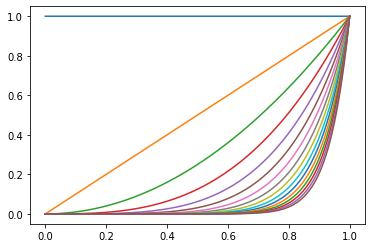

In [7]:
_ = plot(x,Pn)
# We can see how the values behaves. Each time, the points are closer

In [8]:
# I want to plot the whole polinomial - Example
# p = 1-x+3x^2-3x^3+0x^5
p = Pn.dot(array([1,-1,3,-3,0,0]))
# Glance at the product operation -> p = C \dot Pn, were Pn is the xn evaluated 

ValueError: shapes (1025,16) and (6,) not aligned: 16 (dim 1) != 6 (dim 0)

In [9]:
plot(x,p)

NameError: name 'p' is not defined

In [10]:
# Interpolation points
q = linspace(0,1,n)

# A placeholder
A = zeros((n,n))

# It is filled with the evaluation of the interpolation points
# This is the known A in my notes - In this case, the basis is the monomial (x^n).
# The alternative is to use Lagrange
for i in range(n):
    A[:,i] = q**i


In [57]:
# Bad example of interpolation
def runge(x):
    return 1./(1+50*(x-0.5)**2)

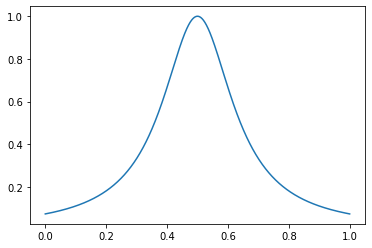

In [58]:
plot(x, runge(x))

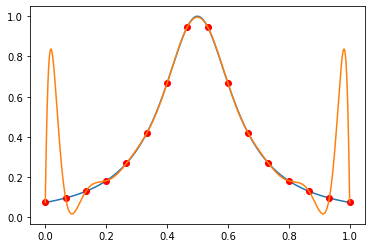

In [13]:
G=runge(q)
# We can find the A^-1 -> bad idea and inefficient

# This is according to the eqn: Ap = G
p=linalg.solve(A,G)

# Plot of the original function
plot(x,runge(x))
# Plot of the interpolation points from the original func
plot(q,runge(q), 'ro')
# Plot the interpolation
plot(x, Pn.dot(p))

In [14]:
# Better with n=16, but as cathastrophic results on the sides

In [15]:
# Sum of absolute values of the basis func
lebesgue = sum(abs(Pn), axis=1)

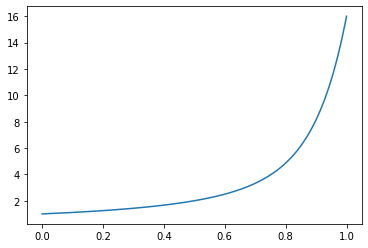

In [16]:
plot(x,lebesgue)

In [17]:
linalg.cond(A)

3121676336416.1743

In [18]:
# See that the problem in the end of the Interpolation comes from the condition number... 
# You can see that the lesbegue is getting worst as soon as it get closer to 1.0

# Now with Lagrange

In [40]:
# Generate the lagrange evaluations
n = 5
q = linspace(0,1,n)

Ln = zeros((ref, n))
for i in range(n):
    Ln[:,i] = 1
    for j in range(n):
        if j != i:
            Ln[:,i] *= (x-q[j])/(q[i]-q[j])
# It is possible to generate this in a single line from Array spawning

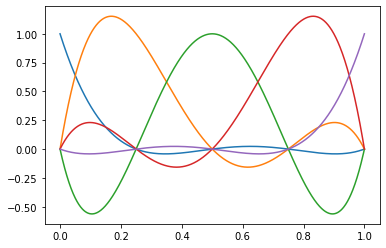

In [41]:
plot(x,Ln)

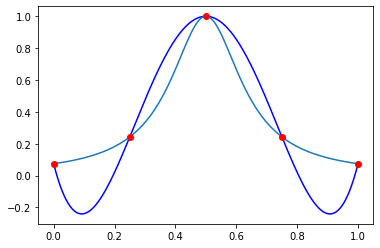

In [42]:
# Interpolation with Lagrange P = Ln G
plot(x, Ln.dot(runge(q)), 'b')
# Real value
plot(x, runge(x))
# Highlight of interpolation points
plot(q, runge(q), 'ro')

In [52]:
# Let's perform the interpolation now: 
# x-> point to interpolate, 
# q-> where I forced P = G
# f-> function to interpolate

def compute_lagrange_basis(x,q):
    ref = len(x)
    n = len(q)
    Ln = ones((ref, n))
    for i in range(n):
        for j in range(n):
            if j != i:
                Ln[:,i] *= (x-q[j])/(q[i]-q[j])
    return Ln
    

def interpolation(x,q,f):
    Ln = compute_lagrange_basis(x,q)
    return Ln.dot(f(q))

def compute_lebesgue(x,q):
    '''
    Associated to th Lagrange interpolation based on q
    '''
    Ln = compute_lagrange_basis(x,q)
    return sum(abs(Ln), axis=1)
    

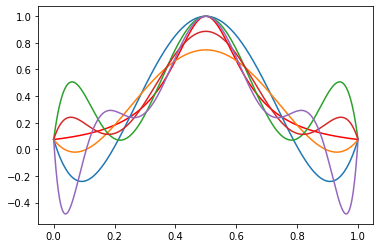

In [53]:
# Real value
plot(x, runge(x), 'r')

for n in range(5,10):

    q = linspace(0,1,n)
    p = interpolation(x,q,runge)

    # Interpolation with Lagrange P = Ln G
    plot(x, p)

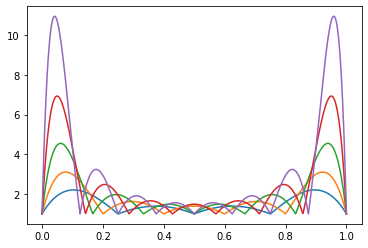

In [45]:
# Lesbegue: How good it is the interpolation

for i in range(5,10):
    plot(x, compute_lebesgue(x,linspace(0,1,i)))
    
# Greater -> worse

In [46]:
# MACRO: assumes something globally
def cost_function(q):
    '''
    Assume x is defined globally
    Computes the lebesgue associated to q
    Return the max on the x points
    '''
    return max(compute_lebesgue(x,q))

# We want it minimise it!
# Chevichev points minimise it!

In [47]:
cost_function(q)

10.945053241895417

In [48]:
# We want the optimal!
import scipy 
import scipy.optimize

q = linspace(0,1,5)

qopt = scipy.optimize.minimize(cost_function, q)

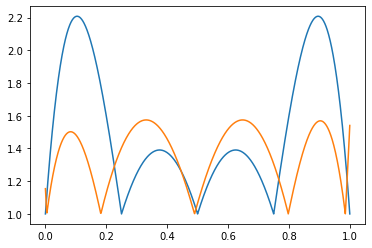

In [49]:
plot(x, compute_lebesgue(x,q))
plot(x, compute_lebesgue(x,qopt.x))

In [55]:
# We get lower values... Which are OK
qopt.x

array([0.00444457, 0.18205912, 0.48997074, 0.79789204, 0.98540389])

TypeError: unsupported operand type(s) for -: 'OptimizeResult' and 'float'

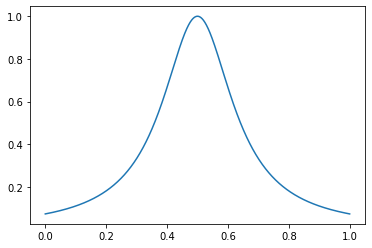

In [59]:
# Let's see now interpolation
plot(x,runge(x))
plot(qopt,runge(qopt), 'ro')
plot(x,interpolation(x,qopt,runge))